# 데이터 불러오기

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn')
from matplotlib import rc, font_manager
style.use("fivethirtyeight")
style.use("seaborn-talk")
plt.rcParams['font.family'] = 'serif'

import pickle

import re

from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [481]:
train_df=pd.read_csv('../dataset/train/train.csv')
test_df=pd.read_csv('../dataset/test/test_data.csv')

In [482]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [483]:
train_df.columns

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')

In [484]:
test_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [485]:
train_df['label'].unique()

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'per:date_of_birth',
       'org:place_of_headquarters', 'per:employee_of', 'per:origin',
       'per:title', 'org:members', 'per:schools_attended',
       'per:colleagues', 'per:alternate_names', 'per:spouse',
       'org:founded_by', 'org:political/religious_affiliation',
       'per:children', 'org:founded', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:dissolved', 'per:parents',
       'per:religion', 'per:date_of_death', 'per:place_of_residence',
       'per:other_family', 'org:product', 'per:siblings', 'per:product',
       'per:place_of_death'], dtype=object)

In [486]:
test_df['label'].unique()

array([100], dtype=int64)

# 결측치

In [487]:
train_df.isnull().sum()

id                0
sentence          0
subject_entity    0
object_entity     0
label             0
source            0
dtype: int64

In [488]:
test_df.isnull().sum()

id                0
sentence          0
subject_entity    0
object_entity     0
label             0
source            0
dtype: int64

- 결측값 없음

# 중복값

In [512]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [521]:
len(train_df)

32470

In [519]:
index1=train_df[['sentence','subject_entity','object_entity','source','label']].drop_duplicates().index
len(index1)

32428

In [520]:
index2=train_df[['sentence','subject_entity','object_entity','source']].drop_duplicates().index
len(index2)

32423

- 동일한 'sentence','subject_entity','object_entity','source' 값을 가져도 'label'이 다른 경우가 존재

In [523]:
set(index1)-set(index2)

{3296, 12829, 22258, 25094, 32299}

In [529]:
dup_sentences=train_df.loc[list(set(index1)-set(index2))]['sentence'].values

In [535]:
dup_df=train_df[train_df[['sentence','subject_entity','object_entity','source']].duplicated(keep=False)]

In [539]:
dup_df[dup_df['sentence'].isin(dup_sentences)].sort_values('sentence')

,id,sentence,subject_entity,object_entity,label,source
6749,6749,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",no_relation,wikipedia
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
8364,8364,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",no_relation,wikitree
32299,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree
11511,11511,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",per:place_of_residence,wikitree
22258,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
277,277,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
4212,4212,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:members,wikitree


- 동일한 'sentence','subject_entity','object_entity','source' 값을 가져도 'label'이 다른 경우가 존재하므로 'sentence','subject_entity','object_entity','source','label' 컬럼 기준으로 중복값 제거하면 좋을듯

In [543]:
f'중복제거 이전 train_df: {len(train_df)}개'

'중복제거 이전 train_df: 32470개'

In [544]:
train_df=train_df[['sentence','subject_entity','object_entity','source','label']].drop_duplicates().reset_index(drop=True)

In [545]:
f'중복제거 이후 train_df: {len(train_df)}개'

'중복제거 이후 train_df: 32428개'

In [546]:
f'중복건수 {32470-32428}개'

'중복건수 42개'

# 데이터 분포

## Train / Test 데이터

In [547]:
print(f'Train 데이터 개수: {len(train_df)}개')
print(f'Test 데이터 개수: {len(test_df)}개')

Train 데이터 개수: 32428개
Test 데이터 개수: 7765개


Text(0, 0.5, '')

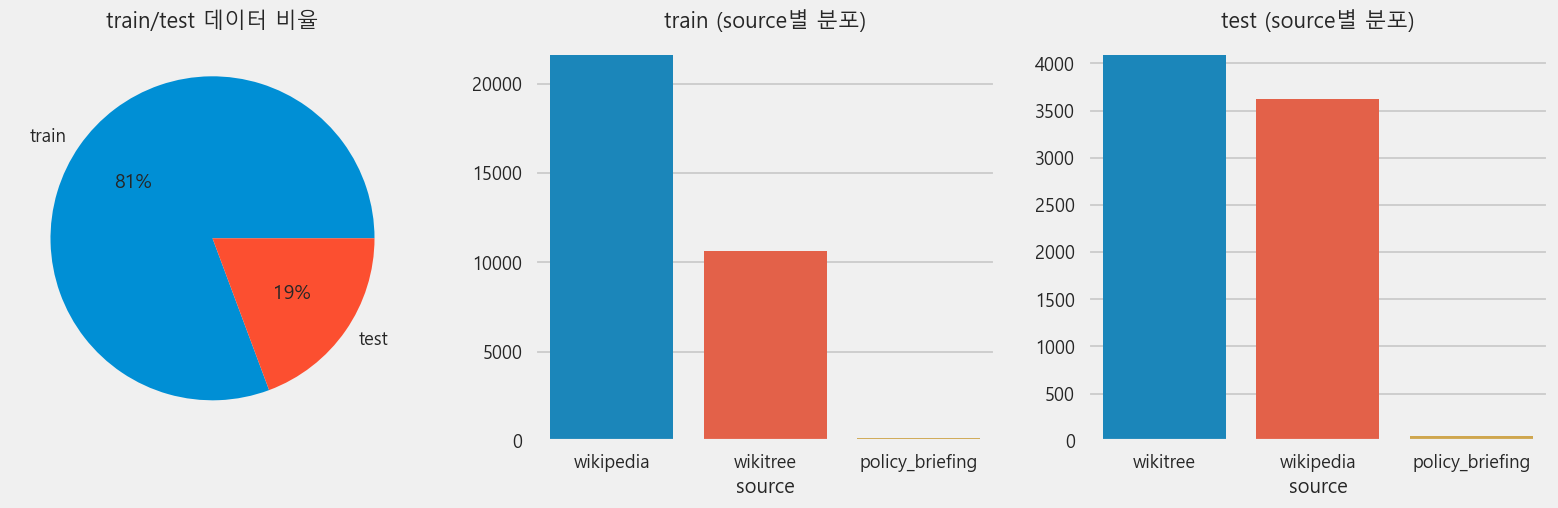

In [548]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].pie([len(train_df),len(test_df)], labels = ['train','test'], autopct='%.0f%%')
ax[0].set_title('train/test 데이터 비율')
sns.countplot(x='source', data=train_df, ax=ax[1])
ax[1].set_title('train (source별 분포)')
ax[1].set_ylabel("")
sns.countplot(x='source', data=test_df, ax=ax[2])
ax[2].set_title('test (source별 분포)')
ax[2].set_ylabel("")

- train/test는 8:2 비율
- 출처별 데이터 분포는 비슷한 양상을 보임

## Label 분포

In [549]:
with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)

In [550]:
with open('./dict_num_to_label.pkl', 'rb') as f:
    num_to_label = pickle.load(f)

In [551]:
label_type

{'no_relation': 0,
 'org:top_members/employees': 1,
 'org:members': 2,
 'org:product': 3,
 'per:title': 4,
 'org:alternate_names': 5,
 'per:employee_of': 6,
 'org:place_of_headquarters': 7,
 'per:product': 8,
 'org:number_of_employees/members': 9,
 'per:children': 10,
 'per:place_of_residence': 11,
 'per:alternate_names': 12,
 'per:other_family': 13,
 'per:colleagues': 14,
 'per:origin': 15,
 'per:siblings': 16,
 'per:spouse': 17,
 'org:founded': 18,
 'org:political/religious_affiliation': 19,
 'org:member_of': 20,
 'per:parents': 21,
 'org:dissolved': 22,
 'per:schools_attended': 23,
 'per:date_of_death': 24,
 'per:date_of_birth': 25,
 'per:place_of_birth': 26,
 'per:place_of_death': 27,
 'org:founded_by': 28,
 'per:religion': 29}

In [552]:
train_df['label_num']=train_df['label'].apply(lambda x: label_type[x])

In [553]:
test_df['source'].unique()

array(['wikitree', 'wikipedia', 'policy_briefing'], dtype=object)

Text(0, 0.5, '')

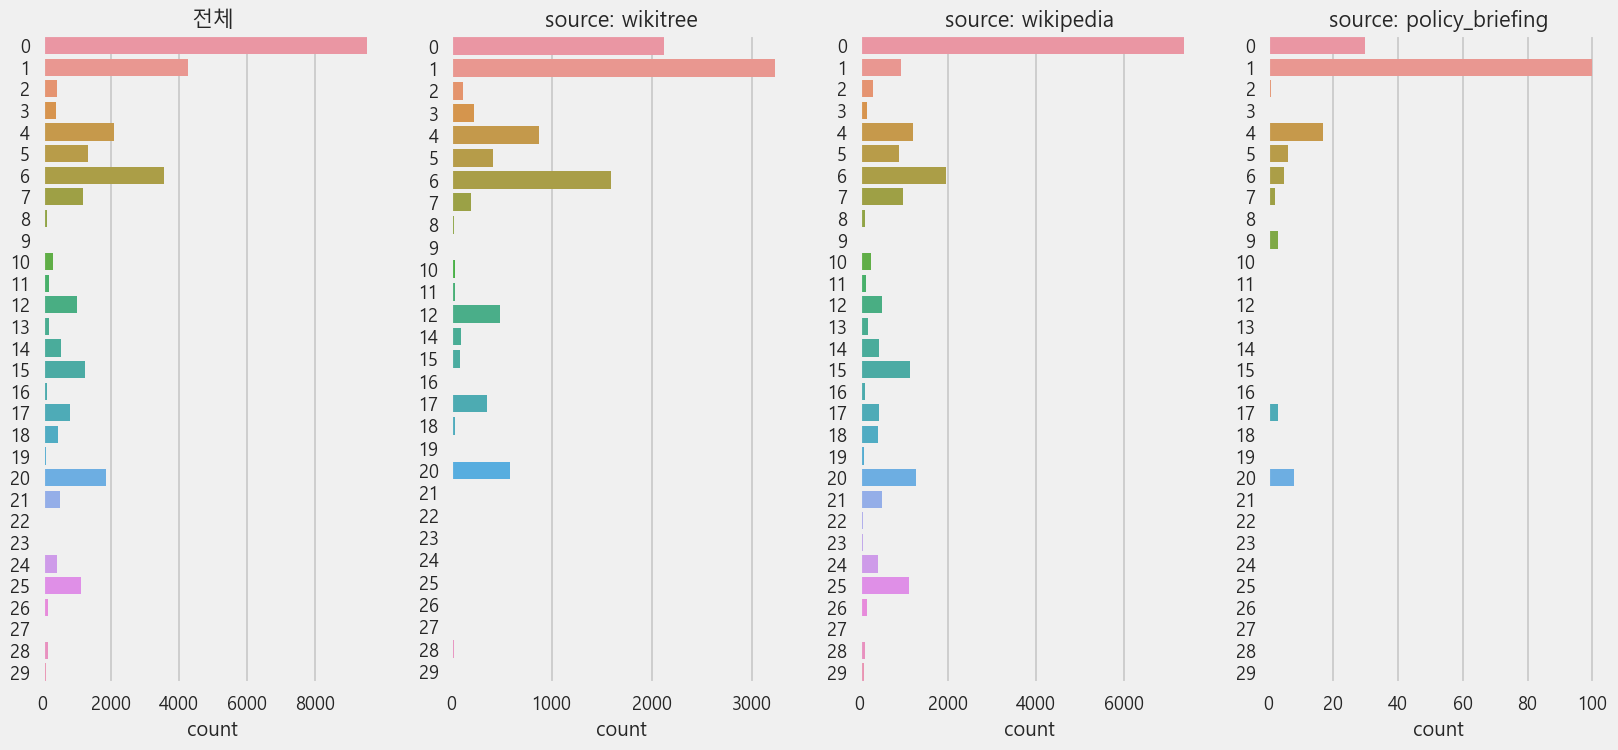

In [554]:
f, ax = plt.subplots(1, 4, figsize=(18, 8))
sns.countplot(y='label_num', data=train_df, ax=ax[0])
ax[0].set_title('전체')
ax[0].set_ylabel("")
sns.countplot(y='label_num', data=train_df[train_df['source']=='wikitree'], ax=ax[1])
ax[1].set_title('source: wikitree')
ax[1].set_ylabel("")
sns.countplot(y='label_num', data=train_df[train_df['source']=='wikipedia'], ax=ax[2])
ax[2].set_title('source: wikipedia')
ax[2].set_ylabel("")
sns.countplot(y='label_num', data=train_df[train_df['source']=='policy_briefing'], ax=ax[3], order=range(0,30))
ax[3].set_title('source: policy_briefing')
ax[3].set_ylabel("")

- source(3종류): 'wikitree', 'wikipedia', 'policy_briefing'
- source가 'policy_briefing'인 data는 10개 label만 존재

## Entity

In [555]:
train_df['subject_type']=train_df['subject_entity'].apply(lambda x: literal_eval(x)['type'])
test_df['subject_type']=test_df['subject_entity'].apply(lambda x: literal_eval(x)['type'])

train_df['object_type']=train_df['object_entity'].apply(lambda x: literal_eval(x)['type'])
test_df['object_type']=test_df['object_entity'].apply(lambda x: literal_eval(x)['type'])

train_df['subject_word']=train_df['subject_entity'].apply(lambda x: literal_eval(x)['word'])
test_df['subject_word']=test_df['subject_entity'].apply(lambda x: literal_eval(x)['word'])

train_df['object_word']=train_df['object_entity'].apply(lambda x: literal_eval(x)['word'])
test_df['object_word']=test_df['object_entity'].apply(lambda x: literal_eval(x)['word'])

### Subject type

Text(0, 0.5, '')

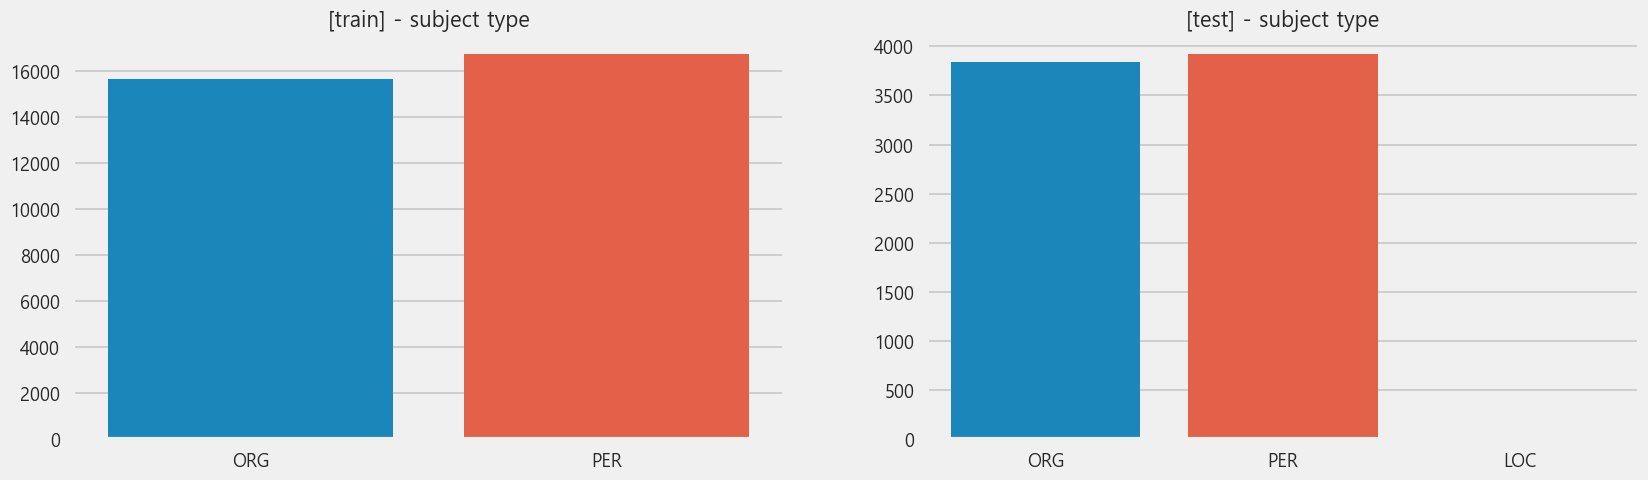

In [556]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x='subject_type', data=train_df, ax=ax[0])
ax[0].set_title('[train] - subject type')
ax[0].set_xlabel("")
ax[0].set_ylabel("")
sns.countplot(x='subject_type', data=test_df, ax=ax[1])
ax[1].set_title('[test] - subject type')
ax[1].set_xlabel("")
ax[1].set_ylabel("")

In [557]:
test_df['subject_type'].value_counts()

PER    3925
ORG    3839
LOC       1
Name: subject_type, dtype: int64

- test_df에서 subject entity type이 "LOC"인 것 하나 존재 &rarr; outlier..? 무시해도 될듯
- train_df와 test_df에서 subject entity type의 분포가 비슷해보임

### Object type
>**인물(PER), 기관(ORG), 지명(LOC), 기타(POH), 기타 수량표현(NOH), 날짜(DAT),** 시간(TIM), 기간(DUR), 통화(MNY), 비율(PNT)

Text(0, 0.5, '')

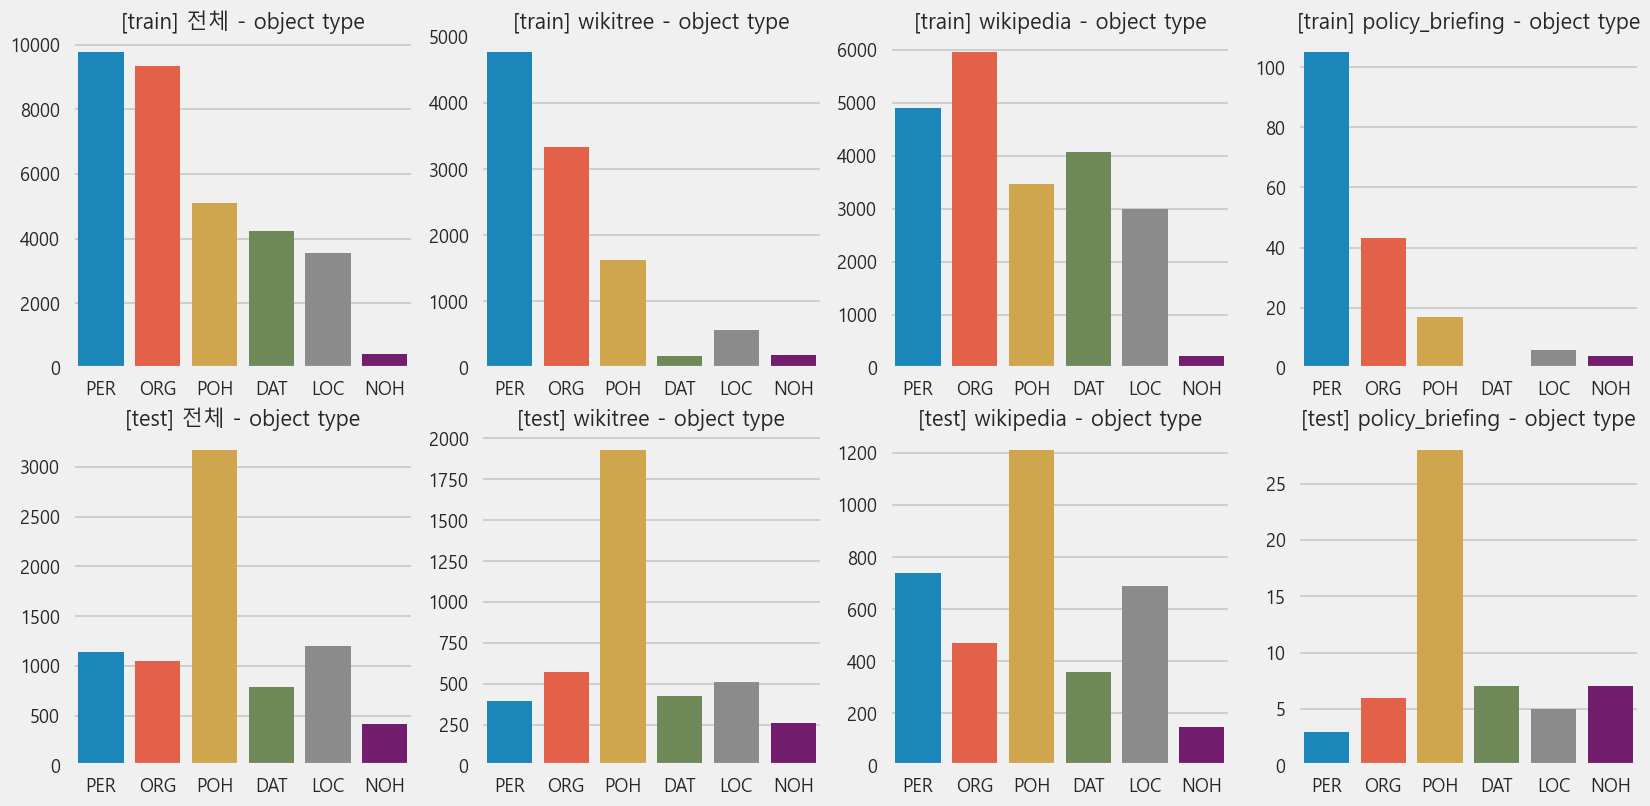

In [558]:
f, ax = plt.subplots(2, 4, figsize=(18, 9))
sns.countplot(x='object_type', data=train_df, ax=ax[0,0], order=train_df['object_type'].value_counts().index)
ax[0,0].set_title('[train] 전체 - object type')
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='wikitree'], ax=ax[0,1], order=train_df['object_type'].value_counts().index)
ax[0,1].set_title('[train] wikitree - object type')
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='wikipedia'], ax=ax[0,2], order=train_df['object_type'].value_counts().index)
ax[0,2].set_title('[train] wikipedia - object type')
ax[0,2].set_xlabel("")
ax[0,2].set_ylabel("")
sns.countplot(x='object_type', data=train_df[train_df['source']=='policy_briefing'], ax=ax[0,3], order=train_df['object_type'].value_counts().index)
ax[0,3].set_title('[train] policy_briefing - object type')
ax[0,3].set_xlabel("")
ax[0,3].set_ylabel("")

sns.countplot(x='object_type', data=test_df, ax=ax[1,0], order=train_df['object_type'].value_counts().index)
ax[1,0].set_title('[test] 전체 - object type')
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='wikitree'], ax=ax[1,1], order=train_df['object_type'].value_counts().index)
ax[1,1].set_title('[test] wikitree - object type')
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='wikipedia'], ax=ax[1,2], order=train_df['object_type'].value_counts().index)
ax[1,2].set_title('[test] wikipedia - object type')
ax[1,2].set_xlabel("")
ax[1,2].set_ylabel("")
sns.countplot(x='object_type', data=test_df[test_df['source']=='policy_briefing'], ax=ax[1,3], order=train_df['object_type'].value_counts().index)
ax[1,3].set_title('[test] policy_briefing - object type')
ax[1,3].set_xlabel("")
ax[1,3].set_ylabel("")

- train_df와 test_df에서 object entity type의 분포가 많이 다름
- source별로 공통된 양상을 보이지 않음 &rarr; source(출처) 변수의 중요도가 작아 보임.

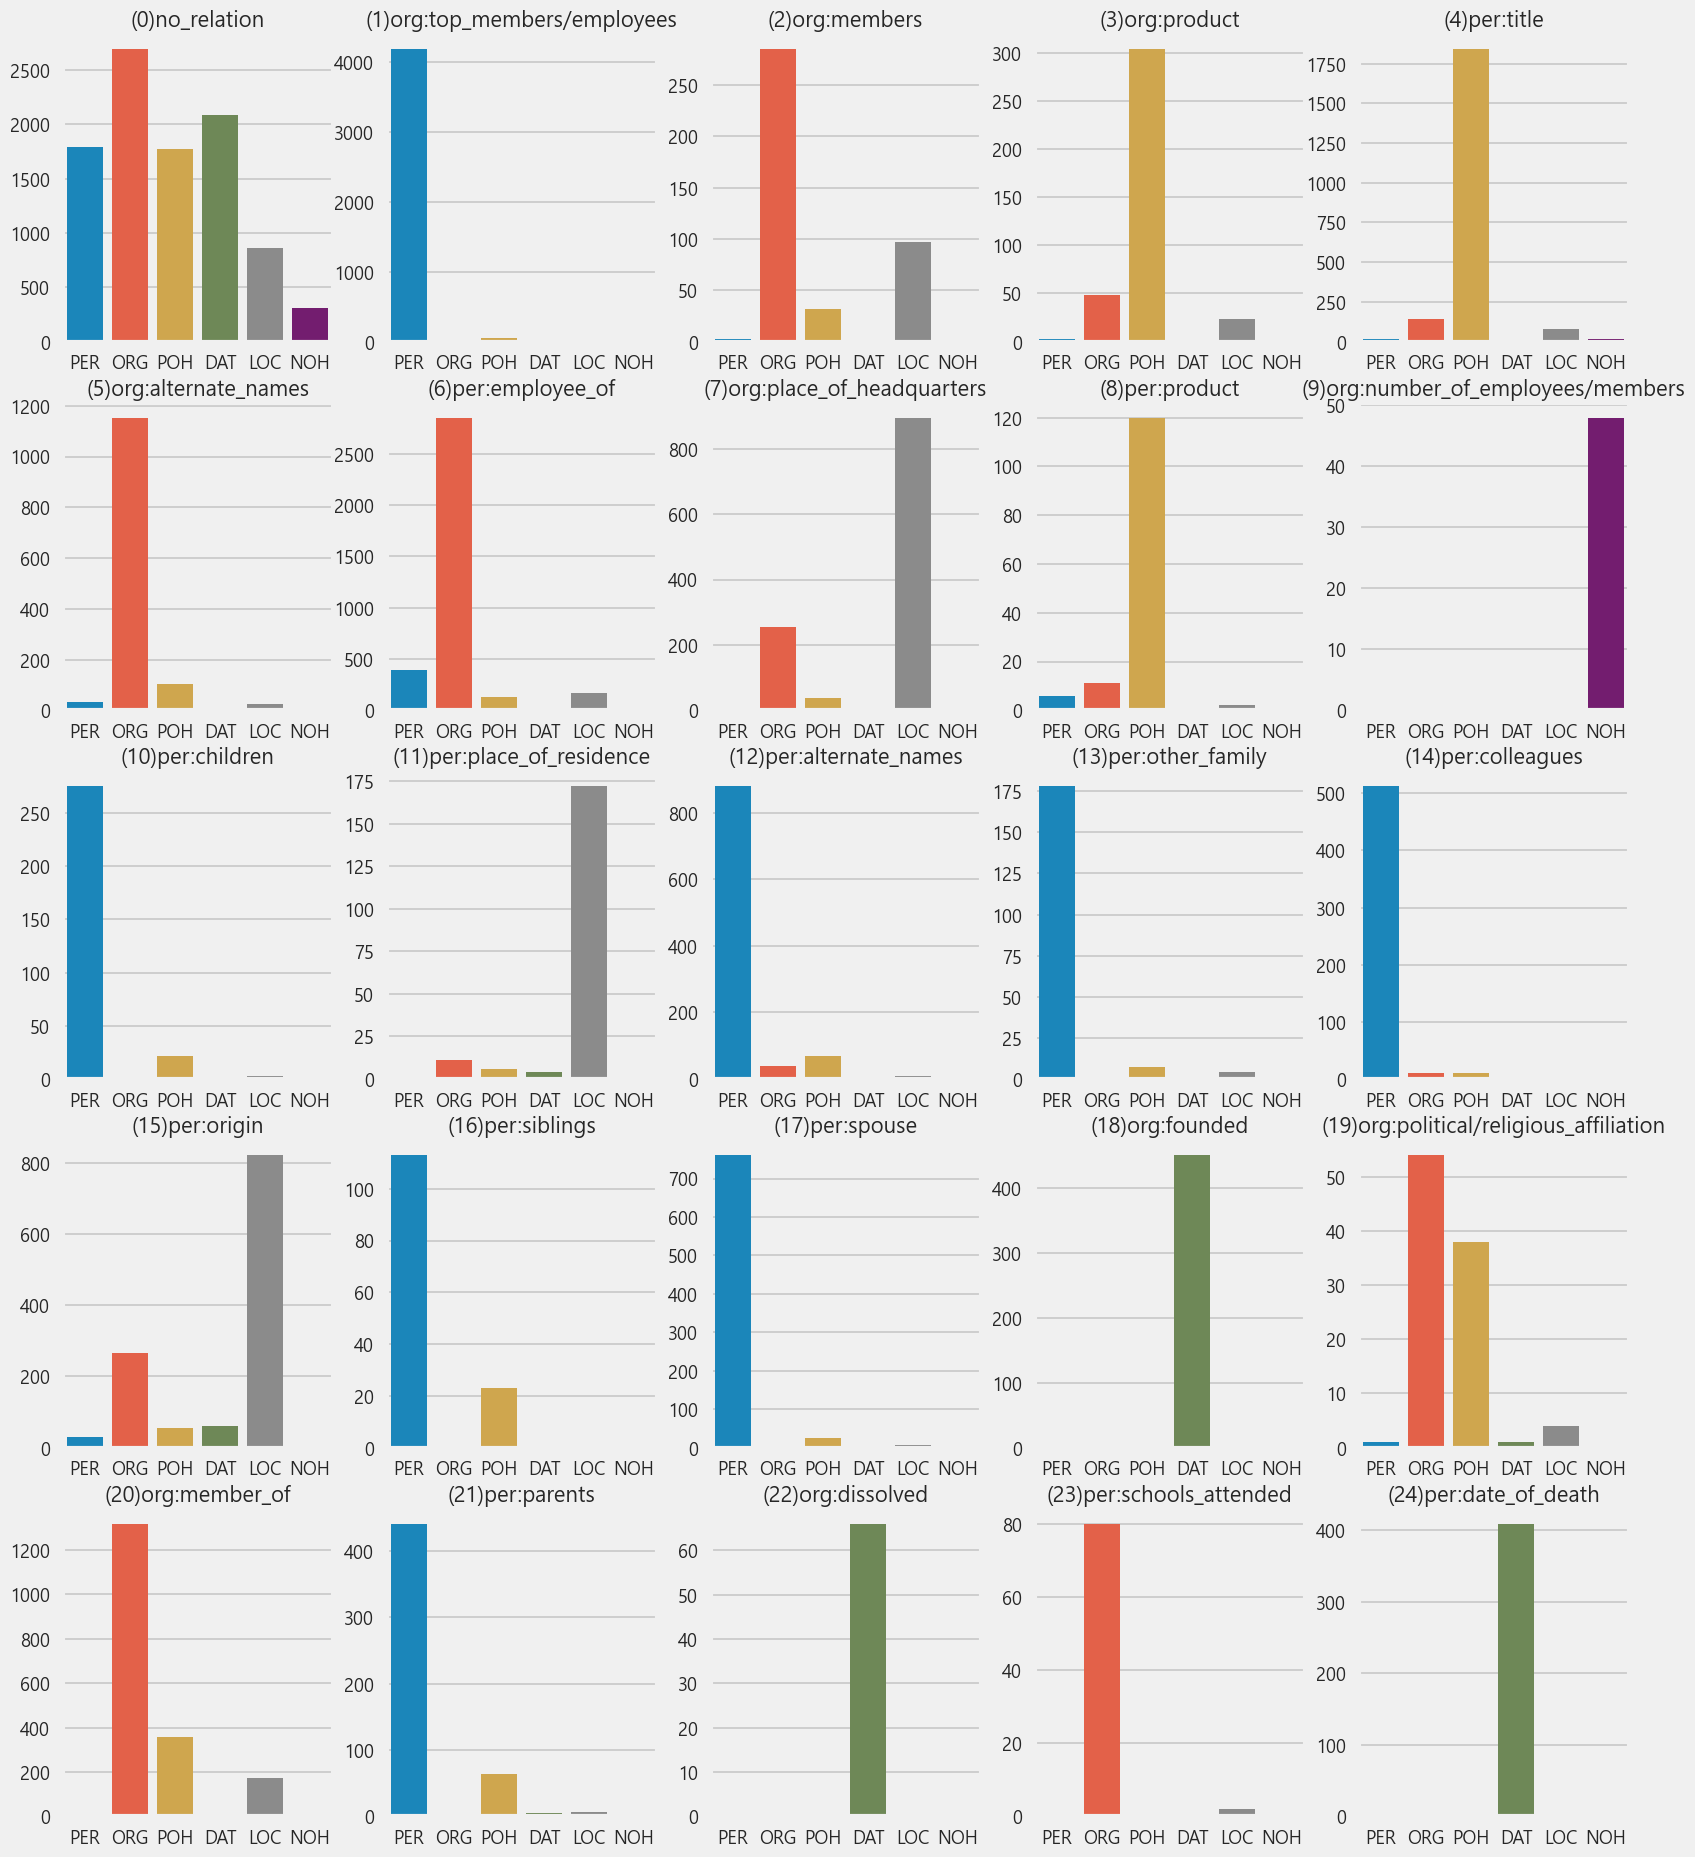

In [559]:
cnt=0
f, ax = plt.subplots(5, 5, figsize=(18, 22))
for i in range(5):
    for j in range(5):
        sns.countplot(x='object_type', data=train_df[train_df['label_num']==cnt], ax=ax[i,j], order=train_df['object_type'].value_counts().index)
        ax[i,j].set_title(f'({cnt}){num_to_label[cnt]}')
        ax[i,j].set_xlabel("")
        ax[i,j].set_ylabel("")
        cnt+=1

- DAT ➡️ (18)org:founded, (22)org:dissolved, (24)oerLdate_of_death
- NOH ➡️ (9)org:number_of_employees/member
- POH ➡️ (3)org:product, (4)per:title, (8)per:product
- LOC ➡️ (7)org:place_of_headquarters, (11)per:place_of_residence, (15)per:origin
- PER ➡️ (1)org:top_members/employees, (10)per:children, (12)per:alternate_names, (13)per:other_family, (14)per:colleagues, (16)per:siblings, (17)per:spouse. (21)per:parents
- ORG ➡️ (2)org:members, (5)org:alternate_names, (6)per:employee_of, (20)org:member_of
- ORG, POH ➡️ (19)org:political/religious_affiliation

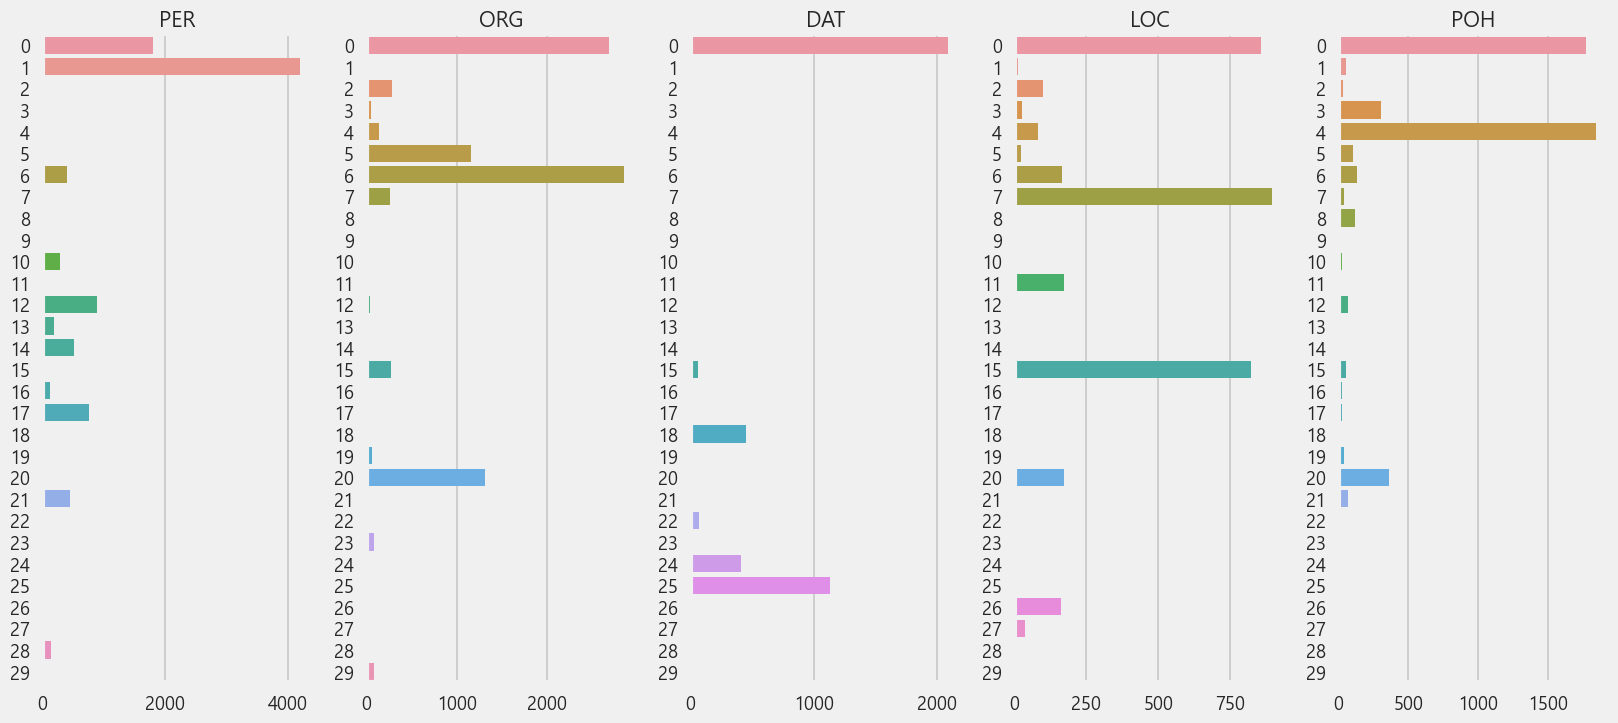

In [560]:
cnt=0
f, ax = plt.subplots(1, 5, figsize=(18, 8))
for i in range(5):
    sns.countplot(y='label_num', data=train_df[train_df['object_type']==train_df['object_type'].unique()[cnt]], ax=ax[i], order=range(30))
    ax[i].set_title(train_df['object_type'].unique()[cnt])
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    cnt+=1

# Tokenizing

## sentence 길이

In [561]:
from transformers import AutoTokenizer
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [562]:
def tokenized_dataset(dataset, tokenizer):
    """ tokenizer에 따라 sentence를 tokenizing 합니다."""
    concat_entity = []
    for e01, e02 in zip(dataset['subject_word'], dataset['object_word']):
        temp = ''
        temp = e01 + '[SEP]' + e02
        concat_entity.append(temp)
    tokenized_sentences = tokenizer(
      concat_entity, #[e01+'[SEP]'+e02, e01+'[SEP]'+e02, ..., e01+'[SEP]'+e02]
      list(dataset['sentence']), #[문장1, 문장2, ..., 문장n]
      return_tensors="pt", # pt: torch.Tensor로 반환
      padding=True,
      truncation=True,
      max_length=256,
      add_special_tokens=True,
      )
    return tokenized_sentences

In [563]:
# tokenizing dataset
tokenized_train = tokenized_dataset(train_df, tokenizer)

In [564]:
tokenized_train

{'input_ids': tensor([[    2, 29830,     3,  ...,     0,     0,     0],
        [    2,  3772,  2139,  ...,     0,     0,     0],
        [    2,  4104, 10904,  ...,     0,     0,     0],
        ...,
        [    2, 18272,  2242,  ...,     0,     0,     0],
        [    2, 15710,     3,  ...,     0,     0,     0],
        [    2, 15437,  2242,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

Text(0, 0.5, '')

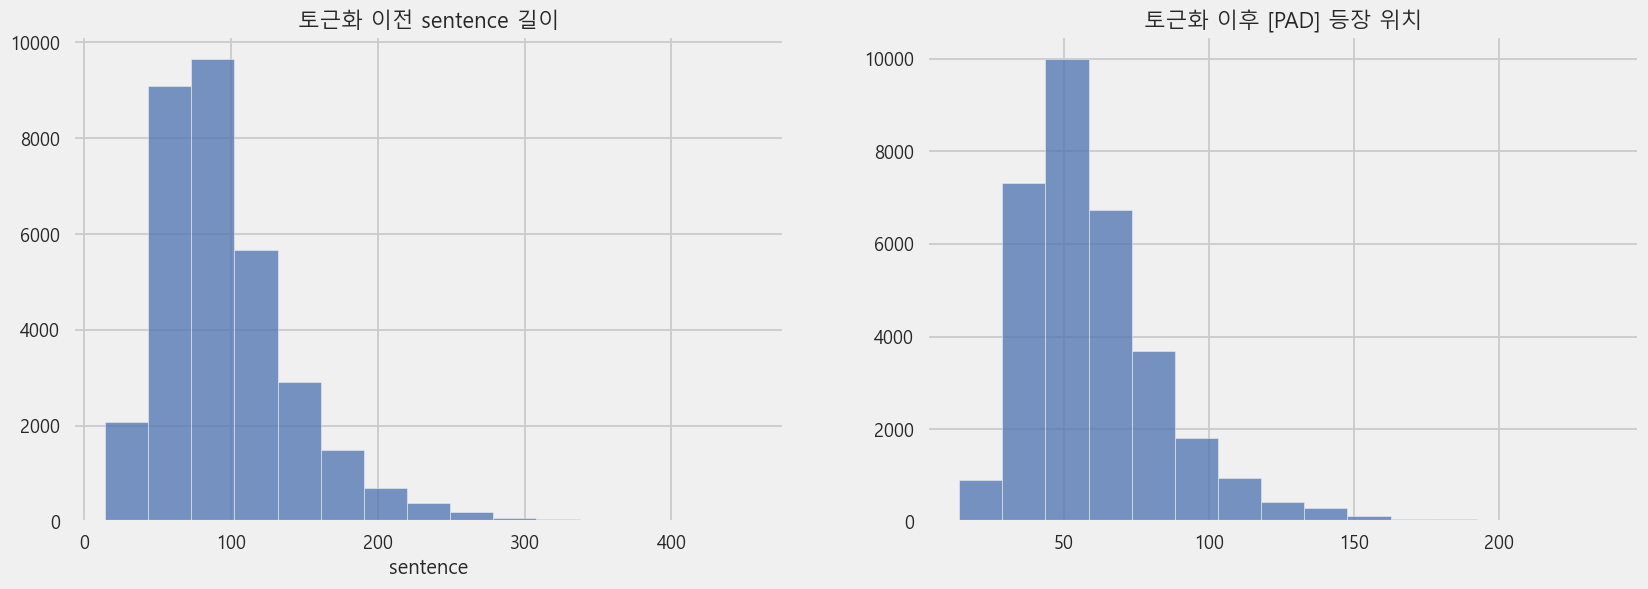

In [565]:
f, ax = plt.subplots(1,2,figsize=(18, 6))
sns.histplot(data=train_df['sentence'].apply(lambda x: len(x)), ax=ax[0], bins=15)
ax[0].set_title('토근화 이전 sentence 길이')
ax[0].set_ylabel("")

sns.histplot(data=tokenized_train['attention_mask'].sum(axis=1), ax=ax[1], bins=15)
ax[1].set_title('토근화 이후 [PAD] 등장 위치')
ax[1].set_ylabel("")

In [567]:
f"토큰화 이전 sentence 최대 길이: {train_df['sentence'].apply(lambda x: len(x)).max()}"

'토큰화 이전 sentence 최대 길이: 455'

In [572]:
f"토큰화 이후 sentence 최대 길이: {tokenized_train['attention_mask'].sum(axis=1).max()}"

'토큰화 이후 sentence 최대 길이: 237'

In [573]:
tokenized_train['attention_mask'].shape

torch.Size([32428, 237])

In [574]:
len(train_df)

32428

- 토근화 이후 문장 최대 길이는 237임을 알 수 있음.(토크나이징할 때 max_length=256로 설정한 상태)

## [UNK]토큰

In [575]:
tokenizer.convert_ids_to_tokens([0, 1, 2, 3, 4])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

In [576]:
tokenized_train

{'input_ids': tensor([[    2, 29830,     3,  ...,     0,     0,     0],
        [    2,  3772,  2139,  ...,     0,     0,     0],
        [    2,  4104, 10904,  ...,     0,     0,     0],
        ...,
        [    2, 18272,  2242,  ...,     0,     0,     0],
        [    2, 15710,     3,  ...,     0,     0,     0],
        [    2, 15437,  2242,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [577]:
train_df['input_ids']=''
for i in range(len(train_df)):
    train_df['input_ids'][i]=np.array(tokenized_train['input_ids'][i])

In [578]:
unk_train_df=train_df[train_df['input_ids'].apply(lambda x: 1 in x)].reset_index(drop=True)

In [579]:
unk_train_df['without_unk_sentence']=unk_train_df['input_ids'].apply(lambda x: re.sub('(\[PAD]|\[CLS]|\[SEP])','',tokenizer.decode(x,skip_special_tokens=False)).strip())

In [580]:
unk_train_df[['sentence','without_unk_sentence']]

,sentence,without_unk_sentence
0,"박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...","박용오 1937년 4월 29일 박용오 ( 朴 [UNK] [UNK], 1937년 ..."
1,2010년에는 아시아 가수 최초로 마이클 잭슨의 곡을 리메이크하였는데 당시 마이클 ...,스티브 [UNK] Steve Barakatt 2010년에는 아시아 가수 최초로 ...
2,"(KIA 내야수 그, 투수 이동현, 외야수 김경언 ↔ 한화 투수 안영명, 박성호, ...","김경언 외야수 ( KIA 내야수 그, 투수 이동현, 외야수 김경언 [UNK] 한..."
3,진도군은 진도개를 보기 위해 찾아온 관람객들에게 더욱 흥미롭고 즐거움을 선사하기 위...,진도군 진도개 진도군은 진도개를 보기 위해 찾아온 관람객들에게 더욱 흥미롭고 즐...
4,"백한성(白漢成, 水原鶴人, 1899년 6월 15일 조선 충청도 공주 출생 ~ 197...","백한성 조선 충청도 공주 백한성 ( 白 漢 成, 水 原 [UNK] 人, 1899..."
...,...,...
3212,"윤종필 자유한국당 의원은 이날 ""현재 청소년들 휴대폰 과의존 문제가 심각하다""라며 ...","윤종필 자유한국당 윤종필 자유한국당 의원은 이날 "" 현재 청소년들 휴대폰 과의존..."
3213,"해병대의 원산 상륙으로 놀란 이후, 중화인민공화국 주석 마오쩌둥은 전보를 통해 중국...","마오쩌둥 중화인민공화국 해병대의 원산 상륙으로 놀란 이후, 중화인민공화국 주석 ..."
3214,"8월 2일에는 이정모 서울시립과학관 관장 ‘알바트로스’를 주제로, 9일에는 금정연 ...",이정모 서울시립과학관 관장 8월 2일에는 이정모 서울시립과학관 관장 ‘ 알바트로...
3215,"이때 만주 지역에는 크고작은 독립군이 조직되었고, 동만주지방의 홍범도가 이끄는 대한...","홍범도 대한독립군 이때 만주 지역에는 크고작은 독립군이 조직되었고, 동만주지방의..."


In [581]:
for i in range(len(unk_train_df)):
    print(unk_train_df['sentence'][i])
    print(unk_train_df['without_unk_sentence'][i])
    print()

박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ 2009년 11월 4일)는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.
박용오  1937년 4월 29일  박용오 ( 朴 [UNK] [UNK], 1937년 4월 29일 ( 음력 3월 19일 ) ( 음력 3월 19일 ) ~ 2009년 11월 4일 ) 는 서울에서 태어난 대한민국의 기업인으로 두산그룹 회장, KBO 총재 등을 역임했다.

2010년에는 아시아 가수 최초로 마이클 잭슨의 곡을 리메이크하였는데 당시 마이클 잭슨과 함께 작업했던 세계적인 뮤지션 스티브 바라캇(Steve Barakatt)과 마이클 잭슨 곡 "You are not alone"을 작업해 화제가 되었다.
스티브 [UNK]  Steve Barakatt  2010년에는 아시아 가수 최초로 마이클 잭슨의 곡을 리메이크하였는데 당시 마이클 잭슨과 함께 작업했던 세계적인 뮤지션 스티브 [UNK] ( Steve Barakatt ) 과 마이클 잭슨 곡 " You are not alone " 을 작업해 화제가 되었다.

(KIA 내야수 그, 투수 이동현, 외야수 김경언 ↔ 한화 투수 안영명, 박성호, 외야수 김다원). 이 트레이드 상대 중 안영명은 이듬해 이범호의 보상 선수로 팀에 복귀했다.
김경언  외야수  ( KIA 내야수 그, 투수 이동현, 외야수 김경언 [UNK] 한화 투수 안영명, 박성호, 외야수 김다원 ). 이 트레이드 상대 중 안영명은 이듬해 이범호의 보상 선수로 팀에 복귀했다.

진도군은 진도개를 보기 위해 찾아온 관람객들에게 더욱 흥미롭고 즐거움을 선사하기 위해 ▲팔백리길을 돌아온 백구 생가 토피어리 조형물 ▲어로(犬수영장)수렵장 ▲진도개 애견 캠핑장 등도 운영하고 있다.
진도군  진도개  진도군은 진도개를 보기 위해 찾아온 관람객들에게 더욱 흥미롭고 즐거움을 선사하기 위해 ▲팔백리길을 돌아온 백구 생가 토피어리 조형물 ▲어로 ( [UNK] 수영장 ) 수렵장 ▲진도개 애견 캠

- [UNK] 토큰에 해당하는 단어는 대부분 한자임.